### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [66]:
# Customazation oif the Variables, yes =1 and no =0
# simplification of countries
simp_country=1
# Simplification of currency
simp_currency=1
# Simplification of main_category:
simp_category=1
# overestimation
over_estimation=0
# Underestimation
under_estimation=0
# Categorization of the backers count
# Attention: Very costly computation 
cat_backers_count=0

In [67]:
# Chosen Variables
not_used_list=['city', 'usd_pledged','sub_category','backers_count','launched_year']
num_list=['goal_usd']
cat_list=['country','currency','main_category','creator_projects']

In [68]:
# The variable city contain over 11000 different entries, ohe possible with so many variables?
# For the time being, city variable will be dropped

### data import

In [2]:
imp=r"...\GitHub\MAY23_BDA_INT_Crowdfunding\data\kaggle\Kaggle_deduplicated.csv"
df=pd.read_csv(imp,index_col='id')
df.drop(columns='Unnamed: 0',inplace=True)
display(df.head())
display(df.info())

,currency,backers_count,country,status,usd_pledged,main_category,goal_usd,city,duration,launched_year,creator_projects
id,,,,,,,,,,,
1714728788,CAD,16,CA,failed,577.902078,food,785.82065,Victoria,60.0,2018,1
1639965256,USD,7,US,successful,211.000000,publishing,93.00000,San Diego,24.0,2014,1
1582062943,USD,99,US,successful,4697.000000,food,1500.00000,Philadelphia,30.0,2020,1
1888984372,USD,3,US,failed,222.000000,technology,25000.00000,Chicago,60.0,2019,1
1409770586,USD,100,US,successful,5410.000000,publishing,5000.00000,Madrid,30.0,2015,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180677 entries, 1714728788 to 1126079486
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   currency          180677 non-null  object 
 1   backers_count     180677 non-null  int64  
 2   country           180677 non-null  object 
 3   status            180677 non-null  object 
 4   usd_pledged       180677 non-null  float64
 5   main_category     180677 non-null  object 
 6   goal_usd          180677 non-null  float64
 7   city              180677 non-null  object 
 8   duration          180677 non-null  float64
 9   launched_year     180677 non-null  int64  
 10  creator_projects  180677 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 16.5+ MB


None

In [5]:
df['status'].replace(['successful','failed'],[1,0],inplace=True)

In [10]:
for c in df.country:
    df.loc[df["country"]==c,"success_rate"]=sum(df.status)/len(df.status)
df["success_rate"].value_counts()

In [4]:
pd.crosstab(df.country,df.status,normalize='index')

status,failed,successful
country,,
AT,267,178
AU,2028,2165
BE,309,240
CA,3665,4669
CH,350,287
DE,1727,1494
DK,344,461
ES,1086,911
FR,1147,1463


### Variable Simplifications

In [70]:
# Categorisation of the backers count
if cat_backers_count==1:
    df['backers_count'].replace(range(0,101),'0-100',inplace=True)
    df['backers_count'].replace(range(101,1001),'101-1000',inplace=True)
    df['backers_count'].replace(range(1001,10001),'1001-10000',inplace=True)
    df['backers_count'].replace(range(10001,200000),'10000+',inplace=True)

In [71]:
# Potential Simplification of variables
if simp_country==1:
    df['country'].replace(['GB','CA'],'GB,CA',inplace=True)
    df['country'].replace(['DE','FR','IT','ES','NL','SE','DK','CH','IE','BE','AT','NO','LU','PL','GR','SI'],'Europe',inplace=True)
    df['country'].replace(['HK','SG','JP'],'Asia',inplace=True)
    df['country'].replace(['MX'],'South America and Mexico',inplace=True)
    df['country'].replace(['AU','NZ'],'Australia and new Zealand',inplace=True)

In [72]:
if simp_category==1:
    df['main_category'].replace(['music','film & video','games','comics','dance'],'Entertainment',inplace=True)
    df['main_category'].replace(['art','fashion','design','photography','theater'],'Culture',inplace=True)
    df['main_category'].replace(['technology','publishing','food','crafts','journalism'],'Others',inplace=True)

In [73]:
if simp_currency==1:
    df['currency'].replace(['AUD','MXN','SEK','HKD','NZD','DKK','SGD','CHF','JPY','NOK','PLN'],'Others',inplace=True)

### Split of the data

In [74]:
# Target Variable
df['status'].replace(['successful','failed'],[1,0],inplace=True)
df_y=df['status']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='status',axis=1),df_y,test_size=0.2,random_state=42)

### Preprocessing of the data

In [76]:
# standardizing of the numerical variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# 
X_train_num=X_train[num_list]
X_test_num=X_test[num_list]
X_train_num[num_list]=sc.fit_transform(X_train[num_list])
X_test_num[num_list]=sc.fit_transform(X_test[num_list])

C:\Users\Franz.000\AppData\Local\Temp\ipykernel_6848\1827690632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_num[num_list]=sc.fit_transform(X_train[num_list])
C:\Users\Franz.000\AppData\Local\Temp\ipykernel_6848\1827690632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_num[num_list]=sc.fit_transform(X_test[num_list])


In [77]:
# OneHotEncoding of the categorical variable of X_train
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe_train=ohe.fit_transform(X_train[cat_list])
column_name=ohe.get_feature_names_out(cat_list)
X_train_ohe=pd.DataFrame(ohe_train,columns=column_name,index=X_train.index)

c:\Users\Franz.000\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
# OHE X_test variable
ohe2=OneHotEncoder(sparse=False)
ohe_test=ohe2.fit_transform(X_test[cat_list])
column_name2=ohe2.get_feature_names_out(cat_list)
X_test_ohe=pd.DataFrame(ohe_test,columns=column_name2,index=X_test.index)

c:\Users\Franz.000\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
X_train_merge_org=pd.concat([X_train_num,X_train_ohe],axis=1)
X_test_merge=pd.concat([X_test_num,X_test_ohe],axis=1)
X_train_merge_org

,goal_usd,country_Asia,country_Australia and new Zealand,country_Europe,"country_GB,CA",country_South America and Mexico,country_US,currency_CAD,currency_EUR,currency_GBP,currency_Others,currency_USD,main_category_Culture,main_category_Entertainment,main_category_Others,creator_projects_1,creator_projects_16-30,creator_projects_2-5,creator_projects_31+,creator_projects_6-15
id,,,,,,,,,,,,,,,,,,,,
781204563,-0.036060,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
778958499,-0.031843,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
819008480,-0.034430,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1251003856,-0.034635,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
116494538,-0.034965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849998769,-0.035197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
270142259,-0.036155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
802024238,0.011285,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


#### Resampling and Analysisvariable

In [80]:
if over_estimation==1:
    from imblearn.over_sampling import RandomOverSampler 
    rOs=RandomOverSampler()
    X_over,y_over=rOs.fit_resample(X_train_merge_org,y_train)
    X_train_merge=X_over
    y_train=y_over
else:
    X_train_merge=X_train_merge_org

In [81]:
if under_estimation==1:
    from imblearn.under_sampling import RandomUnderSampler
    rUs=RandomUnderSampler()
    X_under,y_under=rUs.fit_resample(X_train_merge_org,y_train)
    X_train_merge=X_under
    y_train=y_under

In [82]:
len(X_train_merge)

144541

### Modelling of the data

Which model to chose?
- Classification. tree or regression?

Which metric to evaluate?
- Eigentlich ja nur Modelle mit den Daten füttern Verbindung zum Project eher unwichtig, keine Projektdaten



In [83]:
# Maschine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

In [84]:
if (simp_country==1) & (simp_currency==1) & (simp_category==1) & (over_estimation==0) & (under_estimation==0):
    print("The following models are computed with the countries, currencies, and main categories grouped into new categorical variables of less modalities. Over or undersampling is not used (the necessity to do so, was checked).")
elif (simp_country==0) & (simp_currency==0) & (simp_category==0) & (over_estimation==0) & (under_estimation==0):
    print("The following models are computed with the countries, currencies, and main categories as the original categorical variables with all modalities. Over or undersampling is not used (the necessity to do so, was checked).")

The following models are computed with the countries, currencies, and main categories grouped into new categorical variables of less modalities. Over or undersampling is not used (the necessity to do so, was checked).


In [85]:
# Potential one hot encoder problem
# Some values are unique which cuases a mismatch in columns
for item in X_train_merge.columns:
    if item not in X_test_merge.columns:
        print('Error',item)
        X_test_merge[item]=0

In [86]:
# Potential one hot encoder problem
for item in X_test_merge.columns:
    if item not in X_train_merge.columns:
        print('Error',item)
        X_train_merge[item]=0

In [87]:
# Classification tree
tree=DecisionTreeClassifier()
tree.fit(X_train_merge,y_train)
tree_pred=tree.predict(X_test_merge)
print('Decision Tree R2 value:',tree.score(X_test_merge,y_test))

Decision Tree R2 value: 0.5929267212751826


In [88]:
# Random Forest
rfc=RandomForestClassifier()
rfc.fit(X_train_merge,y_train)
rfc_pred=rfc.predict(X_test_merge)
print('Random Forest R2 value:',rfc.score(X_test_merge,y_test))

Random Forest R2 value: 0.5961644897055568


In [89]:
# Logistical Regression
log=LogisticRegression()
log.fit(X_train_merge,y_train)
log_pred=log.predict(X_test_merge)
print('Logistical Regression R2 value:',log.score(X_test_merge,y_test))

Logistical Regression R2 value: 0.6486606154527341


In [90]:
# KNN
knn=neighbors.KNeighborsClassifier()
knn.fit(X_train_merge,y_train)
knn_pred=knn.predict(X_test_merge)
print('K-nearest neighbours classification R2 value:',knn.score(X_test_merge,y_test))

K-nearest neighbours classification R2 value: 0.6164212973212309


In [91]:
# Crosstab
print('Decision Tree')
display(pd.crosstab(y_test,tree_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('Random Forest')
display(pd.crosstab(y_test,rfc_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('Logistical Regression')
display(pd.crosstab(y_test,log_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('KNN')
display(pd.crosstab(y_test,knn_pred,normalize=True, rownames=['True'], colnames=['Prediction']))

Decision Tree


Prediction,0,1
True,,
0,0.225980,0.191582
1,0.215491,0.366947


Random Forest


Prediction,0,1
True,,
0,0.214468,0.203094
1,0.200742,0.381697


Logistical Regression


Prediction,0,1
True,,
0,0.201572,0.215990
1,0.135350,0.447089


KNN


Prediction,0,1
True,,
0,0.200908,0.216654
1,0.166925,0.415514


In [92]:
# Classification Report
from sklearn.metrics import classification_report
print('Decision Tree \n',classification_report(y_test,tree_pred))
print('Random Forest \n',classification_report(y_test,rfc_pred))
print('Logistical Regression \n',classification_report(y_test,log_pred))
print('KNN \n',classification_report(y_test,knn_pred))

Decision Tree 
               precision    recall  f1-score   support

           0       0.51      0.54      0.53     15089
           1       0.66      0.63      0.64     21047

    accuracy                           0.59     36136
   macro avg       0.58      0.59      0.58     36136
weighted avg       0.60      0.59      0.59     36136

Random Forest 
               precision    recall  f1-score   support

           0       0.52      0.51      0.52     15089
           1       0.65      0.66      0.65     21047

    accuracy                           0.60     36136
   macro avg       0.58      0.58      0.58     36136
weighted avg       0.60      0.60      0.60     36136

Logistical Regression 
               precision    recall  f1-score   support

           0       0.60      0.48      0.53     15089
           1       0.67      0.77      0.72     21047

    accuracy                           0.65     36136
   macro avg       0.64      0.63      0.63     36136
weighted avg      

In [93]:
df_y.value_counts(normalize=True)

1    0.58169
0    0.41831
Name: status, dtype: float64

In [94]:
# Conclusion
print('We can see that the logistical regresson has the best overall value with an F1 Score of 0.78 (as well as the KNN), inspite of failing to converge with the default solver lbfgs (the limit of iterations reached). Moreover, the logistic regression model has the highest precision (avoiding false positives). It is interesting that the KNN model scores better on the recall (avoids false negatives better.)')

we can see that the logistical regresson has the best overall value with an F1 Score of 0.78 (as well as the KNN), inspite of failing to converge with the default solver lbfgs (the limit of iterations reached). Moreover, the logistic regression model has the highest precision (avoiding false positives). It is interesting that the KNN model scores better on the recall (avoids false negatives better.)


In [95]:
# Buildung the Coefficient DataFrame
log_importance=pd.DataFrame({'Variables':X_train_merge.columns,'Coefficient':log.coef_[0]})
log_importance_negatives=log_importance.sort_values('Coefficient',ascending=True)
log_importance_positives=log_importance.sort_values('Coefficient',ascending=False)

In [96]:
display(log_importance_negatives.head())
display(log_importance_positives.head())

,Variables,Coefficient
0,goal_usd,-14.695584
15,creator_projects_1,-1.771741
17,creator_projects_2-5,-0.865229
5,country_South America and Mexico,-0.485315
14,main_category_Others,-0.146148


,Variables,Coefficient
16,creator_projects_16-30,1.563243
18,creator_projects_31+,1.392820
1,country_Asia,0.732426
13,main_category_Entertainment,0.656110
19,creator_projects_6-15,0.387409


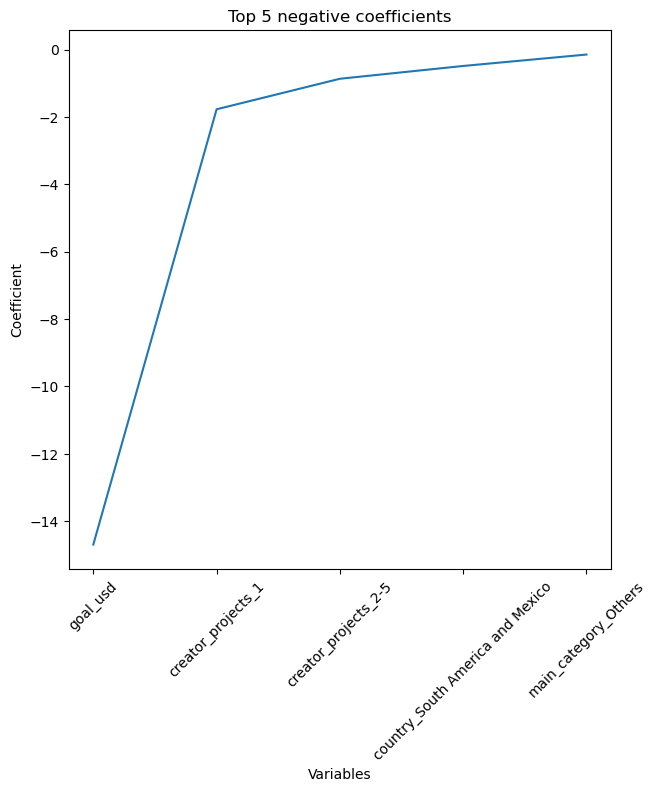

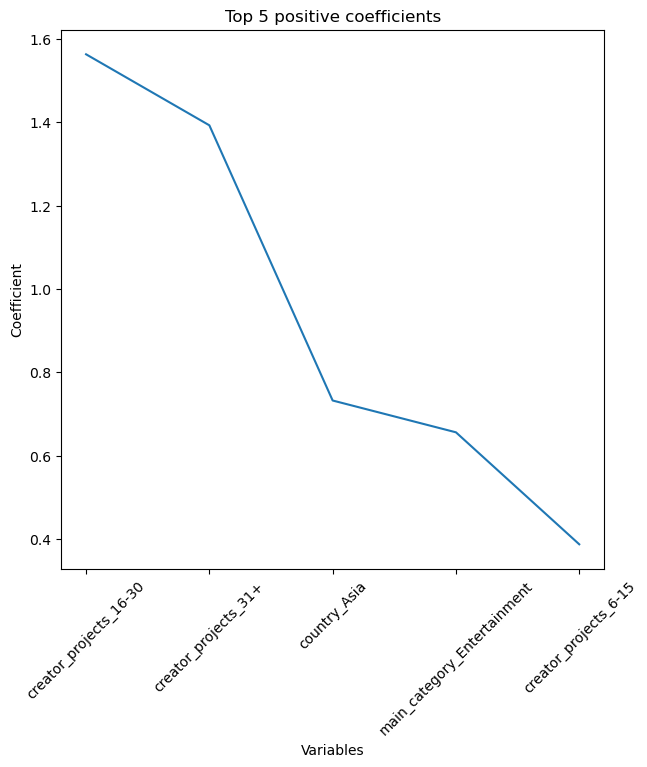

In [97]:
# Plotting the Coefficeint DataFrame
plt.figure(figsize=[7,7])
plt.plot(log_importance_negatives['Variables'][0:5],log_importance_negatives['Coefficient'][0:5])
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.title('Top 5 negative coefficients');
plt.show()
plt.figure(figsize=[7,7])
plt.plot(log_importance_positives['Variables'][0:5],log_importance_positives['Coefficient'][0:5])
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.title('Top 5 positive coefficients');

#### Tests

#### Optimize (best) model

In [98]:
# Logistical Regression
log2=LogisticRegression(max_iter=10000)
log2.fit(X_train_merge,y_train)
log2_pred=log.predict(X_test_merge)
print('(Optimized) Logistical Regression R2 value:',log2.score(X_test_merge,y_test)) # same as of 4th decimal digit (at least)

(Optimized) Logistical Regression R2 value: 0.6486606154527341


In [99]:
# confusion matrix
print('Logistical Regression')
display(pd.crosstab(y_test,log2_pred,normalize=True, rownames=['True'], colnames=['Prediction'])) # no substantial difference

Logistical Regression


Prediction,0,1
True,,
0,0.201572,0.215990
1,0.135350,0.447089


In [100]:
# classification report
print('Logistical Regression \n',classification_report(y_test,log2_pred)) # no substantial difference

Logistical Regression 
               precision    recall  f1-score   support

           0       0.60      0.48      0.53     15089
           1       0.67      0.77      0.72     21047

    accuracy                           0.65     36136
   macro avg       0.64      0.63      0.63     36136
weighted avg       0.64      0.65      0.64     36136

